# Notebook imports and packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## Example 1 - A simple cost function

### $$ f(x) = x^2 + x + 1 $$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
def d_f(x):
    return 2*x + 1

In [4]:
# Make data
x_1 = np.linspace(-3, 3, 500)
x_1.shape

(500,)

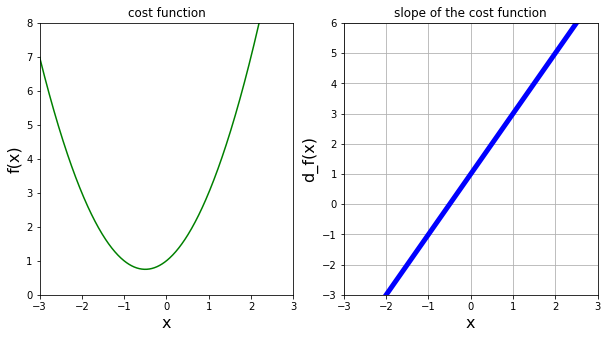

In [5]:
# plot
# 1 Chart: cost function
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.plot(x_1, f(x_1), 'g-')
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('cost function')

# 2 chart: derivative
plt.subplot(1,2,2)
plt.xlim([-3, 3])
plt.ylim([-3, 6])
plt.plot(x_1, d_f(x_1), 'b-', linewidth=5)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('d_f(x)', fontsize=16)
plt.title('slope of the cost function')
plt.show()

# Gradient descent

In [6]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.001

x_list = [new_x]
slope_list = [d_f(new_x)]
for n in range(1000):
    previous_x = new_x
    gradient = d_f(previous_x)
    new_x = previous_x - step_multiplier * gradient
    x_list.append(new_x)
    slope_list.append(d_f(new_x))
    step_size = abs(new_x - previous_x)
    #print()
    delta = step_size - precision
    if delta < 0:
        print('convergence after: ', n, 'iterations')
        break
    
print('min loc: \t', new_x)
print('slope or d_f(min_loc)', d_f(new_x))
print('cost at the point f(x) = ', f(new_x))

convergence after:  30 iterations
min loc: 	 -0.4965337678900009
slope or d_f(min_loc) 0.006932464219998158
cost at the point f(x) =  0.7500120147650404


In [7]:
x_list[-1]

-0.4965337678900009

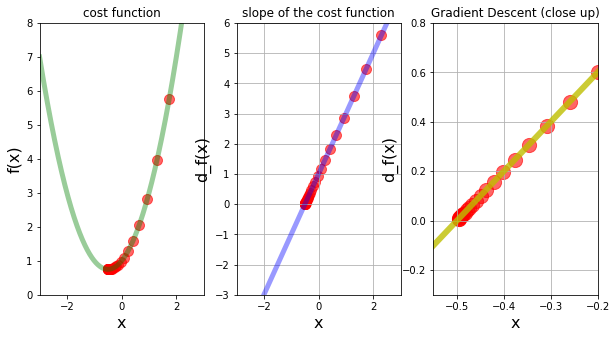

In [8]:
# plot
plt.figure(figsize=[10, 5])

# 1 Chart: cost function

plt.subplot(1,3,1)
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.plot(x_1, f(x_1), 'g-', linewidth=5, alpha=0.4)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('cost function')

# 2 chart: derivative
plt.subplot(1,3,2)
plt.xlim([-3, 3])
plt.ylim([-3, 6])
plt.plot(x_1, d_f(x_1), 'b-', linewidth=5, alpha=0.4)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('d_f(x)', fontsize=16)
plt.title('slope of the cost function')

# gradient descent
plt.subplot(1,3,3)
plt.xlim([-0.55, -0.2])
plt.ylim([-0.3, 0.8])
plt.plot(x_1, d_f(x_1), 'y-', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=200, alpha=0.6)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('d_f(x)', fontsize=16)
plt.title('Gradient Descent (close up)')

plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

### $$ g(x)=x^4 - 4x^2 + 5 $$

In [9]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x ** 4 - 4 * x ** 2 + 5

def d_g(x):
    return 4 * x ** 3 - 8 * x

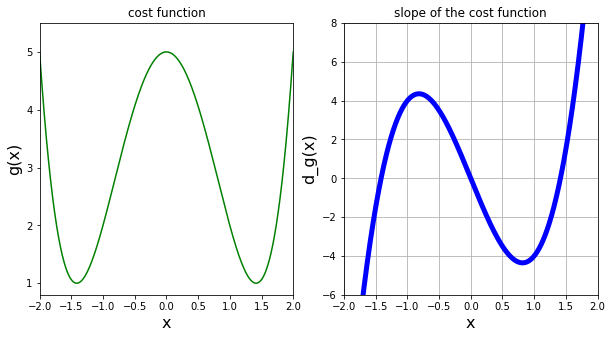

In [10]:
# plot
# 1 Chart: cost function
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.xlim([-2, 2])
plt.ylim([0.8, 5.5])
plt.plot(x_2, g(x_2), 'g-')
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('cost function')

# 2 chart: derivative
plt.subplot(1,2,2)
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.plot(x_2, d_g(x_2), 'b-', linewidth=5)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('d_g(x)', fontsize=16)
plt.title('slope of the cost function')
plt.show()

In [11]:
def gradient_descent(derivative_fn, initial_guess, n_iter=500, l_rate=0.02, precision=0.001):
    new_x = initial_guess
    x_list = list()
    slope_list = list()
    i = 0
    while i in range(n_iter):
        x_list.append(new_x)
        slope_list.append(derivative_fn(new_x))
        
        previous_x = new_x
        gradient = derivative_fn(previous_x)
        new_x = previous_x - l_rate * gradient
        
        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break    
        i += 1
    return new_x, x_list, slope_list

In [12]:
new_x, x_list, slope_list = gradient_descent(d_g, initial_guess=-1.1)

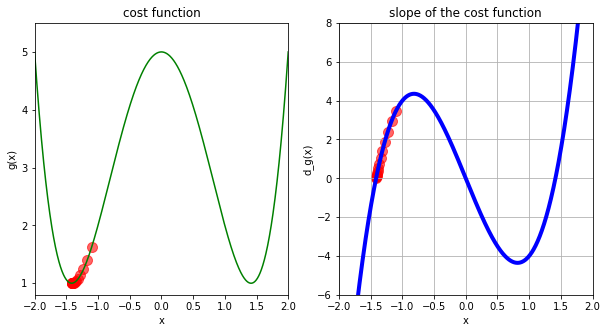

In [13]:
# plot
# 1 Chart: cost function
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.xlim([-2, 2])
plt.ylim([0.8, 5.5])
plt.plot(x_2, g(x_2), 'g-')
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.6)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('cost function')

# 2 chart: derivative
plt.subplot(1,2,2)
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.plot(x_2, d_g(x_2), 'b-', linewidth=4)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)
plt.grid()
plt.xlabel('x')
plt.ylabel('d_g(x)')
plt.title('slope of the cost function')
plt.show()

# # 3 gradient descent

# plt.subplot(1,3,3)
# plt.xlim([-2, 2])
# plt.ylim([-0.5, 0.8])
# plt.plot(x_2, d_g(x_2), 'y-', linewidth=4, alpha=0.8)
# plt.scatter(x_list, slope_list, color='red', s=200, alpha=0.6)
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('d_g(x)')
# plt.title('Gradient Descent (close up)')

# Example 3 - Divergence, Overflow and Python tuples

### $$ h(x)=x^5 - 2x^4 + 2 $$

In [14]:
# Make data

x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x ** 5 - 2 * x ** 4 + 2

def d_h(x):
    return 5 * x ** 4 - 8 * x ** 3

In [15]:
new_x, x_list, slope_list = gradient_descent(d_h, initial_guess=0.2)

convergence after:  116 iterations


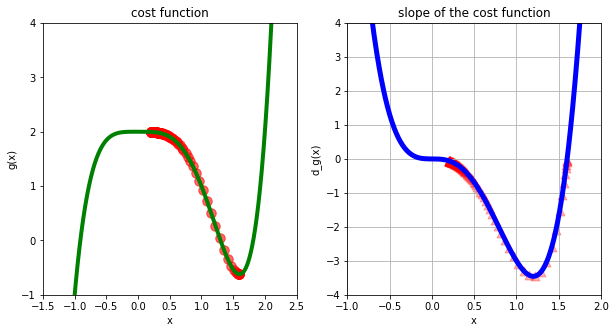

In [16]:
# plot
# 1 Chart: cost function
print('convergence after: ', len(x_list), 'iterations')
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.xlim([-1.5, 2.5])
plt.ylim([-1, 4])
plt.plot(x_3, h(x_3), 'g-', linewidth=4)
plt.scatter(x_list, h(np.array(x_list)), color='red', s=90, alpha=0.6)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('cost function')

# 2 chart: derivative
plt.subplot(1,2,2)
plt.xlim([-1, 2])
plt.ylim([-4, 4])
plt.plot(x_3, d_h(x_3), 'b-', linewidth=5)
plt.scatter(x_list, slope_list, color='red', marker='^', s=80, alpha=0.3)
plt.grid()
plt.xlabel('x')
plt.ylabel('d_g(x)')
plt.title('slope of the cost function')
plt.show()

# # 3 gradient descent

# plt.subplot(1,3,3)
# plt.xlim([-2, 2])
# plt.ylim([-0.5, 0.8])
# plt.plot(x_2, d_g(x_2), 'y-', linewidth=4, alpha=0.8)
# plt.scatter(x_list, slope_list, color='red', s=200, alpha=0.6)
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('d_g(x)')
# plt.title('Gradient Descent (close up)')

In [17]:
new_x, x_list, slope_list = gradient_descent(d_h, initial_guess=-0.2)

OverflowError: (34, 'Result too large')

## we got an OverflowError

convergence after:  70 iterations


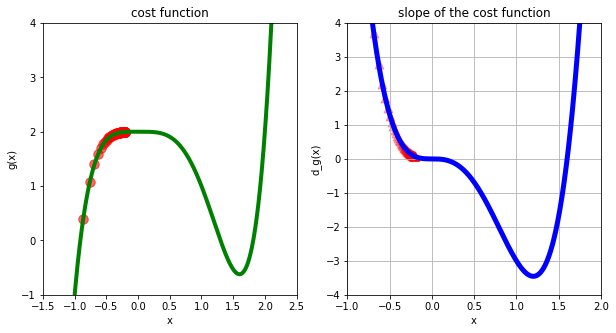

local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  70


In [18]:
new_x, x_list, slope_list = gradient_descent(d_h, initial_guess=-0.2, n_iter=70)
# plot
# 1 Chart: cost function
print('convergence after: ', len(x_list), 'iterations')
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.xlim([-1.5, 2.5])
plt.ylim([-1, 4])
plt.plot(x_3, h(x_3), 'g-', linewidth=4)
plt.scatter(x_list, h(np.array(x_list)), color='red', s=90, alpha=0.6)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('cost function')

# 2 chart: derivative
plt.subplot(1,2,2)
plt.xlim([-1, 2])
plt.ylim([-4, 4])
plt.plot(x_3, d_h(x_3), 'b-', linewidth=5)
plt.scatter(x_list, slope_list, color='red', marker='^', s=80, alpha=0.3)
plt.grid()
plt.xlabel('x')
plt.ylabel('d_g(x)')
plt.title('slope of the cost function')
plt.show()

# # 3 gradient descent

# plt.subplot(1,3,3)
# plt.xlim([-2, 2])
# plt.ylim([-0.5, 0.8])
# plt.plot(x_2, d_g(x_2), 'y-', linewidth=4, alpha=0.8)
# plt.scatter(x_list, slope_list, color='red', s=200, alpha=0.6)
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('d_g(x)')
# plt('local'.title('Gradient Descent (close up)')
print('local min occurs at: ', new_x)
print('Cost at this minimum is: ', h(new_x))
print('Number of steps: ', len(x_list))

In [19]:
h(new_x)

-3.810455326061589e+31

In [20]:
import sys

type(h(new_x))

float

In [21]:
sys.float_info.max

1.7976931348623157e+308

# Example 4 - Data Viz with 3d charts

### $$ f(x, y) = \frac{1}{3^{-x^2-y^2}+1} $$

In [22]:
def f(x, y):
    r = 3**(- x**2 - y**2)
    return 1/(1+r)

In [23]:
# Make our x, y data

x_4 = np.linspace(-2, 2, 200)
y_4 = np.linspace(-2, 2, 200)
x_4, y_4 = np.meshgrid(x_4, y_4)
#x_4.shape, y_4.shape

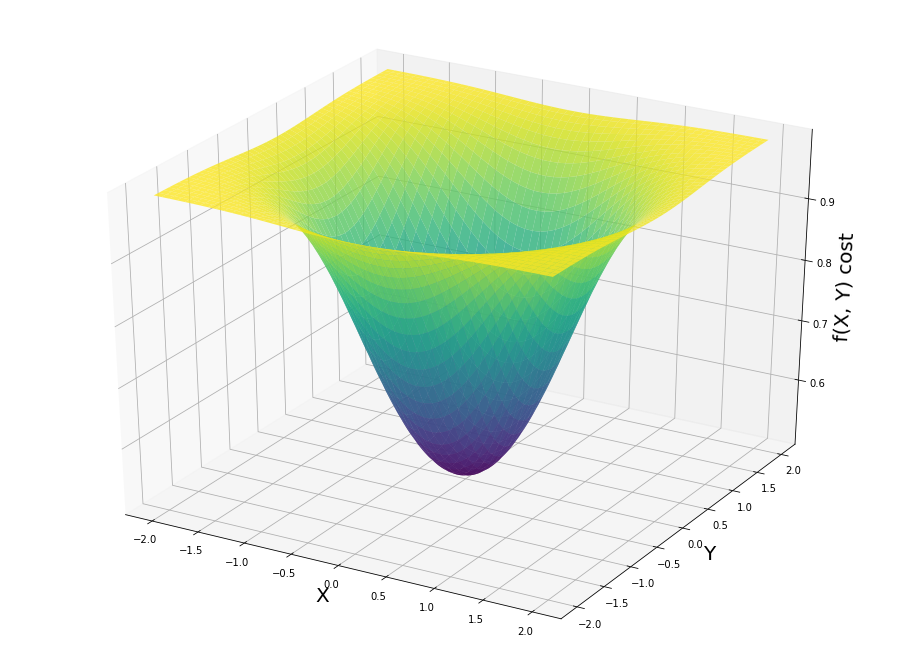

In [24]:
# Generating 3d plot

fig = plt.figure(figsize=[16, 12])
# We need to import Axes3d from mpl_toolkit.plot3d
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X, Y) cost', fontsize=20)
# remember meshgrid args are 2d arrays
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.viridis, alpha=0.8)
plt.show()

### Partial derivatives & symbolic computation
### $$ \frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2} $$
### $$ \frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2} $$

In [25]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('partial derivative wrt x is:', diff(f(a, b), a))
print('partial derivative wrt y is:', diff(f(a, b), b))
print('Value of f(x, y) at x = 1.8, y=1.0 is: %.5f'%f(a, b).evalf(subs={a: 1.8, b:1.0}))
print('Value of derivative wrt x at x = 1.8, y=1.0 is: %.5f'%diff(f(a, b), a).evalf(subs={a: 1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
partial derivative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
partial derivative wrt y is: 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x = 1.8, y=1.0 is: 0.99060
Value of derivative wrt x at x = 1.8, y=1.0 is: 0.03681


In [26]:
def d_fx(x, y):
    r = 3**(-x**2 - y**2)
    return 2 * x * log(3) * r / (1 + r)**2

def d_fy(x, y):
    r = 3**(-x**2 - y**2)
    return 2 * y * log(3) * r / (1 + r)**2

## Batch Gradient Descent with SymPy

In [27]:
# With SYMPY
# Setup 
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

values in gradient array:  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is:  0.500000226534985


In [28]:
# Setup 
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = d_fx(params[0], params[1])
    gradient_y = d_fy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

values in gradient array:  [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [29]:
# Setup 
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = d_fx(params[0], params[1])
    gradient_y = d_fy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    # axis=0 ==> as a row
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
# Results
print('values in gradient array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
values in gradient array:  [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


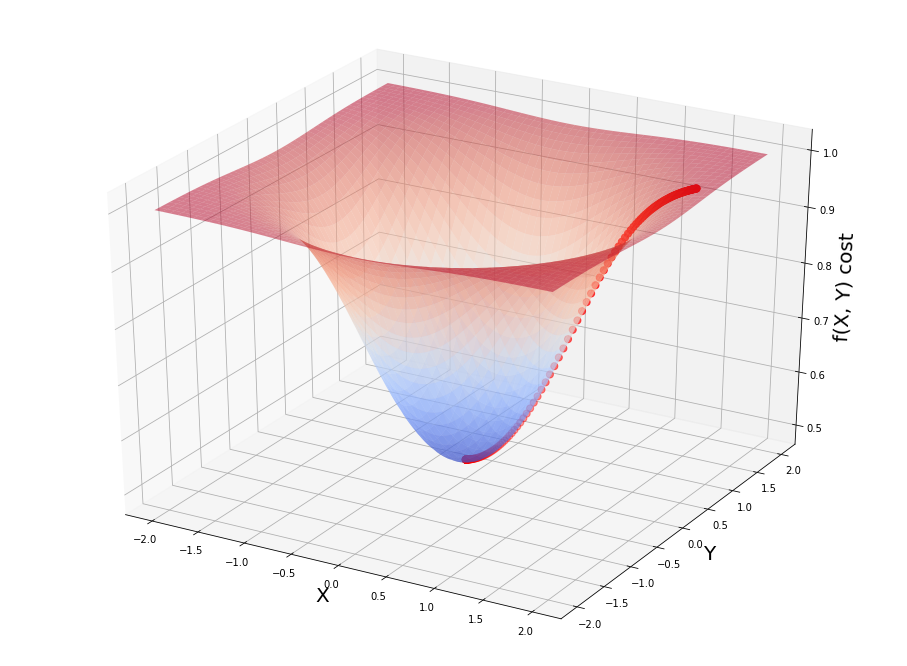

In [30]:
# Generating 3d plot

fig = plt.figure(figsize=[16, 12])
# We need to import Axes3d from mpl_toolkit.plot3d
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X, Y) cost', fontsize=20)
# remember meshgrid args are 2d arrays
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.5)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]),
          s=50, color='red')
plt.show()

In [31]:
# Advanced Numpy Array practice
kir = np.array([['Captain', 'Guitar']])
print(kir.shape)

(1, 2)


# Example 5 - Working with Data & Real Cost Function
## Mean Square Error: cost function for regression problems
### $$ RSS = \sum_{i=0}^n \big( y^{(i)} - h_\theta(x^{(i)})\big)^2 $$
### $$ MSE = \frac{1}{n}\sum_{i=0}^n \big( y^{(i)} - h_\theta(x^{(i)})\big)^2 $$
### $$ MSE = \frac{1}{n}\sum_{i=0}^n \big( y^{(i)} - \hat y\big)^2 $$
When working with very very large number we can encounter overflow error when using the RSS.<br>
That's why it's more efficient to use the MSE (which is smaller than RSS) instead

In [32]:
# Make Data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)



print('Shape of x_5 array:\t', x_5.shape)
print('Shape of y_5 array:\t', y_5.shape)

Shape of x_5 array:	 (7, 1)
Shape of y_5 array:	 (7, 1)


In [33]:
# Quick Linear Regression
linreg = LinearRegression()
linreg.fit(x_5, y_5)
theta_0 , theta_1 = linreg.intercept_[0], linreg.coef_[0][0]
print('Theta 0: ', theta_0)
print('Theta 1: ', theta_1)

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


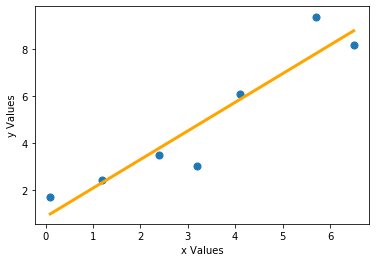

In [34]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, linreg.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x Values')
plt.ylabel('y Values')
plt.show()

In [35]:
# y_hat = theta_0 + theta_1 * x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print('estimated values y_hat are: \n', y_hat)
print('Actual values y are:\n', y_5)

estimated values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual values y are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [36]:
def mse(y, y_pred):
    delta = (y - y_pred)**2
    #mse = 1 / y.size * sum(delta)
    mse = np.average(delta, axis=0)
    return mse

#def mse2(y, y_pred):
#    pass

In [37]:
print('Manually calculated mse is: ', mse(y_5, y_hat)[0])
print('MSE regression using manual calc is: ', mean_squared_error(y_5, y_hat))
print('MSE regression is: ', mean_squared_error(y_5, linreg.predict(x_5)))

Manually calculated mse is:  0.9479655759794577
MSE regression using manual calc is:  0.9479655759794577
MSE regression is:  0.9479655759794577


# 3D Plot of the MSE Cost Function
### Make Data for thetas

In [38]:
nr_thetas = 200
th_0 = np.linspace(-1, 3, nr_thetas)
th_1 = np.linspace(-1, 3, nr_thetas)

plot_th_0, plot_th_1 = np.meshgrid(th_0, th_1)
['th_0: ', th_0.shape], ['plot th_0: ', plot_th_0.shape]

(['th_0: ', (200,)], ['plot th_0: ', (200, 200)])

### Calc MSE using nested for loops

In [39]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_th_0[i][j] + plot_th_1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of plot_th_0:\t', plot_th_0.shape)
print('Shape of plot_th_1:\t', plot_th_1.shape)
print('Shape of plot_cost:\t', plot_cost.shape)

Shape of plot_th_0:	 (200, 200)
Shape of plot_th_1:	 (200, 200)
Shape of plot_cost:	 (200, 200)


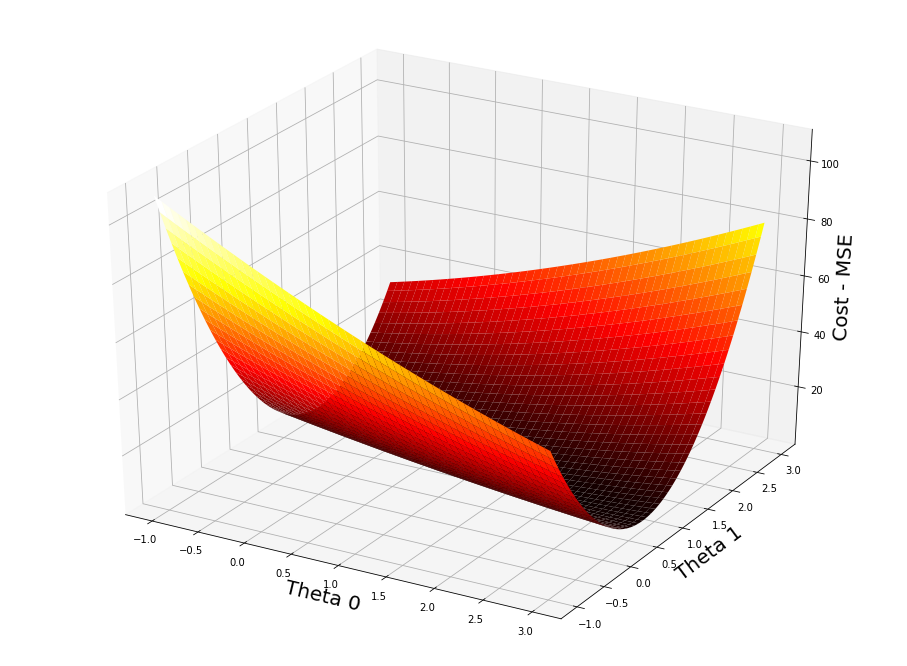

In [40]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12]) # create a figure object
ax = fig.gca(projection='3d') # create a 3d figure from figure

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_th_0, plot_th_1, plot_cost, cmap=cm.hot)
plt.show()

In [41]:
print('min value of plot_cost: ', plot_cost.min())
# recuperer les index i et j qui minimise plot_cost
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('min occurs at (i, j):\t', ij_min)
print('Min MSE for Theta 0 at plot_th_0[%d][%d]'%(ij_min[0], ij_min[1]), plot_th_0[111][91])
print('Min MSE for Theta 1 at plot_th_1[%d][%d]'%(ij_min[0], ij_min[1]), plot_th_1[111][91])

min value of plot_cost:  0.9483826526747164
min occurs at (i, j):	 (111, 91)
Min MSE for Theta 0 at plot_th_0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_th_1[111][91] 1.2311557788944723


## Partial derivative with regard to $\theta_0$ and $\theta_1$
## $$ \frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n}\sum_{i=0}^n\big(y^{(i)}-\theta_0-\theta_1x^{(i)}\big) $$
## $$ \frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n}\sum_{i=0}^n\big(y^{(i)}-\theta_0-\theta_1x^{(i)}\big)x^{(i)} $$

# MSE & Gradient Descent

In [42]:
def gradient(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    #return np.c_[theta0_slope, theta1_slope]
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

Min occurs at Theta 0:	 0.8532230461743415
Min occurs at Theta 1:	 1.2214935332607393
MSE is: 		 [0.94797511]


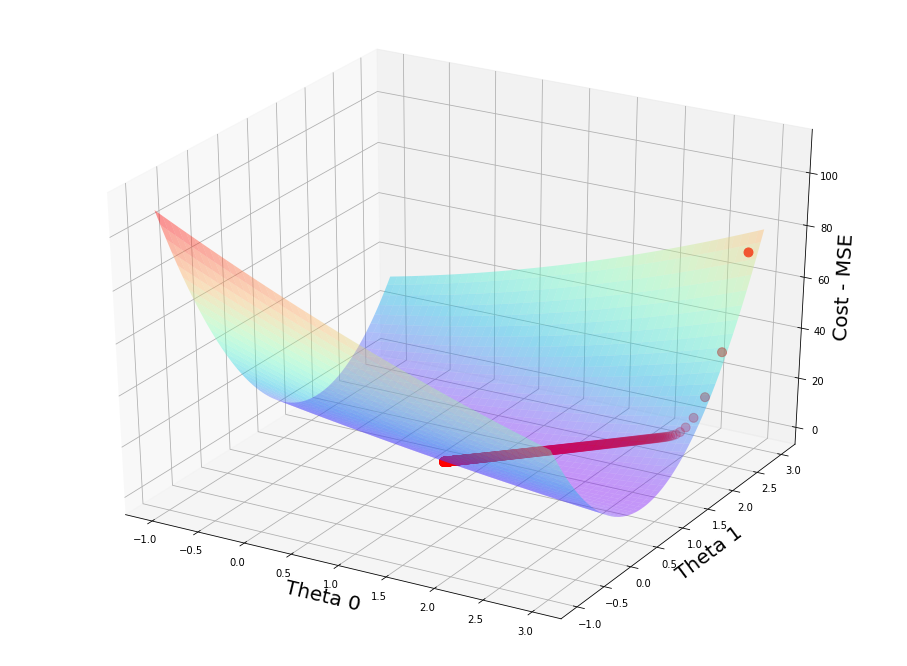

In [43]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * gradient(x_5, y_5, thetas)
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.concatenate((mse_vals, mse(y_5, thetas[0] + thetas[1] * x_5)), axis=0)
    
y_hat = thetas[0] + thetas[1] * x_5    
# results
print('Min occurs at Theta 0:\t', thetas[0])
print('Min occurs at Theta 1:\t', thetas[1])
print('MSE is: \t\t', mse(y_5, y_hat))


# Plotting MSE
fig = plt.figure(figsize=[16, 12]) # create a figure object
ax = fig.gca(projection='3d') # create a 3d figure from figure

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_th_0, plot_th_1, plot_cost, cmap=cm.rainbow, alpha=0.4)
ax.scatter(plot_vals[:, 0], plot_vals[:, 0], mse_vals, s=80, color='red')
plt.show()